In [130]:
import streamlit as st
import pandas as pd
import numpy as np
import altair as alt

In [126]:
def pareto_front(n: int) -> tuple:
    x = np.random.uniform(size = n)
    y = np.random.uniform(size = n)
    order = np.argsort(x)
    pareto_opitimal = [order[0]]
    for index, value in enumerate(order):
        if index == 0:
            best_y = y[value]
        elif y[value] <= best_y:
            best_y = y[value]
            pareto_opitimal.append(value)
        else:
            continue
    classification = np.repeat('Ponto Comum', n)
    classification[pareto_opitimal] = 'Pareto'
    return (x, y, np.array(classification))

In [122]:
x, y, classe = pareto_front(1000)

2 0.815796995775491 0.15215213926750215
15 0.15215213926750215 0.14371549956083662
18 0.14371549956083662 0.09736117845515113
29 0.09736117845515113 0.056735841805295895
67 0.056735841805295895 0.045541163742795154
84 0.045541163742795154 0.023590180173946318
186 0.023590180173946318 0.011445030886814811
295 0.011445030886814811 0.006318608850557461
302 0.006318608850557461 0.005348900430280801
445 0.005348900430280801 0.005192886498694094
523 0.005192886498694094 0.0028886474813832885
716 0.0028886474813832885 0.0019762965532065246


In [123]:
df = pd.DataFrame([(i, j, k) for i, j, k in zip(x, y, classe)], columns = ['x', 'y', 'classe'])

<AxesSubplot:xlabel='x', ylabel='y'>

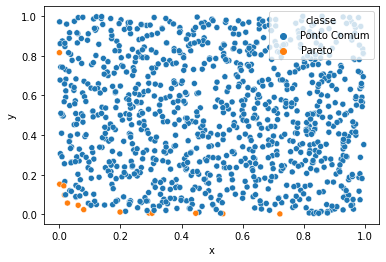

In [124]:
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'classe')

alt.Chart(...)

In [150]:
!pip install pipreqs

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13709 sha256=74d45642a9e1acbe3bd26e03ee2e5b69907d216c17026288b82d0d0de5537e59
  Stored in directory: c:\users\pedro toledo\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt
